In [1]:
import pyart
# What can pyart do?
# https://arm-doe.github.io/pyart/API/index.html
# read raw radar observations
# get radar spec
# plot radar data
# etc.


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
# reading a radar file with pyart
file_path = "./data/20210912_0506_RCWF_VOL.647"
radar_data = pyart.io.read_nexrad_archive(file_path)
radar_data

In [3]:
# checking data structure of "pyart.core.radar.Radar" object
radar_data.info()

altitude:
	data: <ndarray of type: float64 and shape: (1,)>
	long_name: Altitude
	standard_name: Altitude
	units: meters
	positive: up
altitude_agl: None
antenna_transition: None
azimuth:
	data: <ndarray of type: float64 and shape: (8640,)>
	units: degrees
	standard_name: beam_azimuth_angle
	long_name: azimuth_angle_from_true_north
	axis: radial_azimuth_coordinate
	comment: Azimuth of antenna relative to true north
elevation:
	data: <ndarray of type: float32 and shape: (8640,)>
	units: degrees
	standard_name: beam_elevation_angle
	long_name: elevation_angle_from_horizontal_plane
	axis: radial_elevation_coordinate
	comment: Elevation of antenna relative to the horizontal plane
fields:
	cross_correlation_ratio:
		data: <ndarray of type: float32 and shape: (8640, 1832)>
		units: ratio
		standard_name: cross_correlation_ratio_hv
		long_name: Cross correlation_ratio (RHOHV)
		valid_max: 1.0
		valid_min: 0.0
		coordinates: elevation azimuth range
		_FillValue: -9999.0
	velocity:
		data: <nda

In [4]:
# make sweep angle dictionary
angle_list = list(radar_data.fixed_angle["data"])
sweep_angle_dict = {sweep_number:round(angle, 1) for sweep_number, angle in enumerate(angle_list)}
sweep_angle_dict

{0: 0.5,
 1: 0.5,
 2: 0.9,
 3: 0.9,
 4: 1.3,
 5: 1.3,
 6: 1.8,
 7: 2.4,
 8: 3.1,
 9: 4.0,
 10: 5.1,
 11: 6.4,
 12: 8.0,
 13: 10.0,
 14: 12.0,
 15: 14.0,
 16: 16.7,
 17: 19.5}

In [5]:
# use azimuthal equidistant projection

import cartopy

# set radar location as the projection origin
lat = radar_data.latitude['data'][0]
lon = radar_data.longitude['data'][0]
proj = cartopy.crs.AzimuthalEquidistant(central_latitude=lat, central_longitude=lon)

# set boundary of the projecting area
max_range = radar_data.instrument_parameters['unambiguous_range']['data'][0]
proj.bounds = (-max_range, max_range, -max_range, max_range) # x_lower, x_upper, y_lower, y_upper

ModuleNotFoundError: No module named 'cartopy'

In [6]:
import matplotlib.pyplot as plt
import numpy as np


ModuleNotFoundError: No module named 'cartopy'

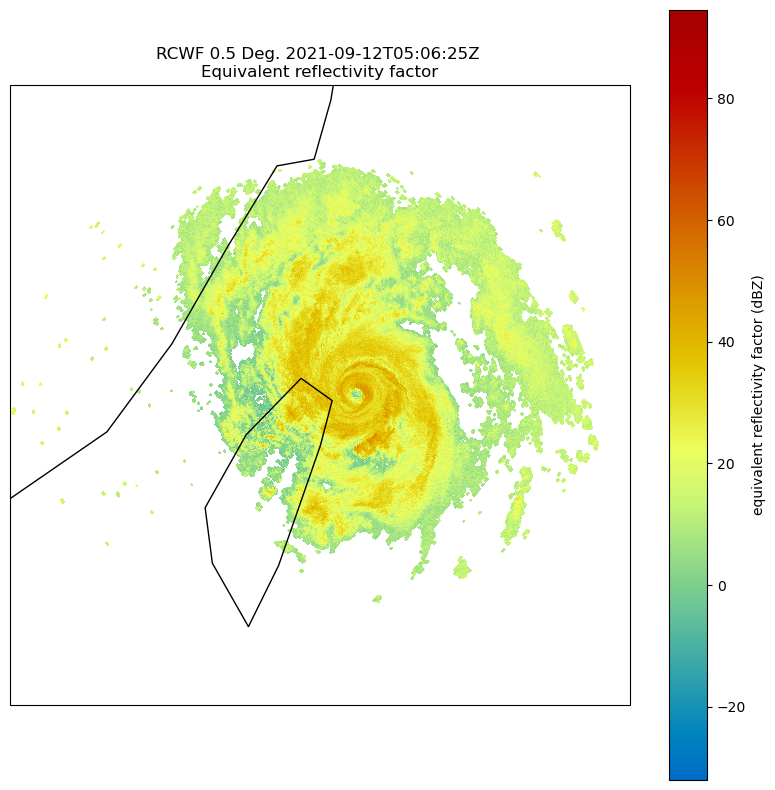

In [11]:
# plot radar data (the most simple version)

# set parameters
variable = "reflectivity"
sweep_number = 0

# make canvas
display = pyart.graph.RadarMapDisplay(radar_data)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

# plot ppi
kwargs = {
    "field" : variable, # plot which variable
    "sweep" : sweep_number, # plot which sweep
    "ax" : ax,
    "fig" : fig
}
display.plot_ppi_map(**kwargs)

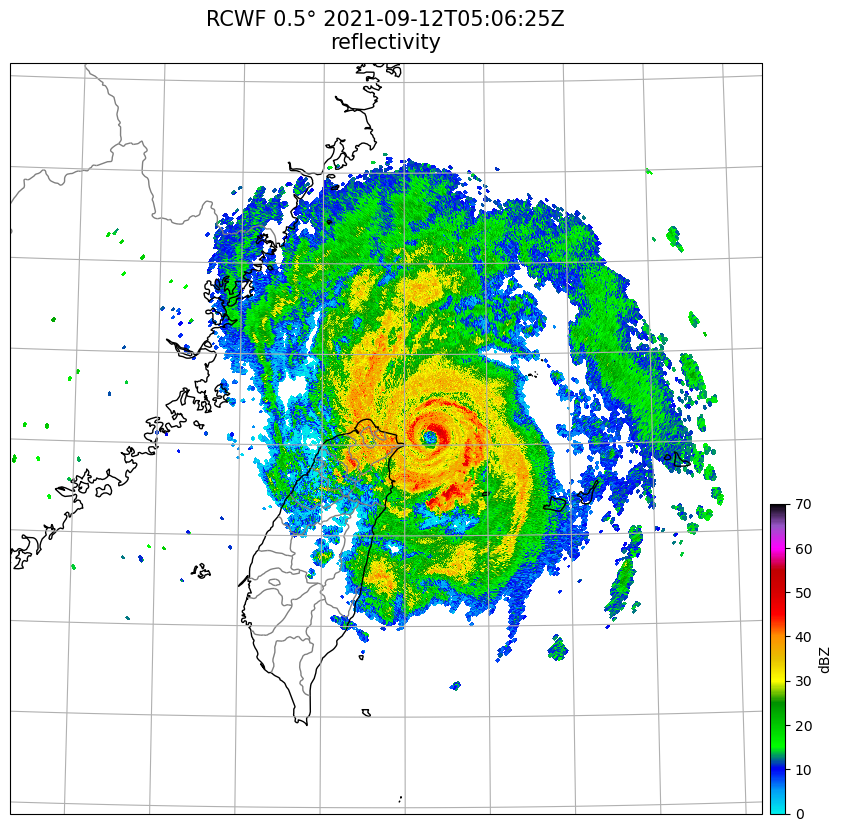

In [12]:
# but if you want to make figure more beautiful

# set parameters
variable = "reflectivity"
sweep_number = 0

# make canvas
display = pyart.graph.RadarMapDisplay(radar_data)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection=proj)

# plot ppi
kwargs = {
    "field" : variable,
    "sweep" : sweep_number,
    "vmin" : 0,
    "vmax" : 70,
    "cmap" : "pyart_NWSRef",
    "title_flag" : False,
    "colorbar_flag" : False,
    "ax" : ax,
    "fig" : fig,
    "lat_lines" : np.arange(-90, 90, 1),
    "lon_lines" : np.arange(-180, 180, 1),
    "resolution" : "10m"
    }
display.plot_ppi_map(**kwargs)

# set colorbar
kwargs = {
    "ax" : ax,
    "orientation" : "vertical",
    "pad" : 0.01,
    "fraction" : 0.02,
    "anchor" : (0, 0.022),
    "label" : "dBZ"
    }
plt.colorbar(display.plots[0], **kwargs)

# set title
station_name = radar_data.metadata["instrument_name"]
sweep_angle = sweep_angle_dict.get(sweep_number)
time = radar_data.time["units"].split(" ")[-1]
variable_name = variable.replace("_", "")
title_text = f"{station_name} {sweep_angle}° {time}\n{variable_name}"
plt.title(title_text, fontsize=15, pad=10)

plt.show()